In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)               

In [17]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/home/unkn0wn27/anaconda3/envs/deep-learning-python-keras/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 332us/step - loss: 0.7245 - acc: 0.5138 - val_loss: 0.6893 - val_acc: 0.5062
Epoch 2/10
20000/20000 [==============================] - 7s 326us/step - loss: 0.6726 - acc: 0.6263 - val_loss: 0.6708 - val_acc: 0.5700
Epoch 3/10
20000/20000 [==============================] - 7s 330us/step - loss: 0.6250 - acc: 0.7263 - val_loss: 0.5928 - val_acc: 0.7444
Epoch 4/10
20000/20000 [==============================] - 7s 326us/step - loss: 0.4927 - acc: 0.7976 - val_loss: 0.4570 - val_acc: 0.7992
Epoch 5/10
20000/20000 [==============================] - 7s 331us/step - loss: 0.3825 - acc: 0.8433 - val_loss: 0.5114 - val_acc: 0.7918
Epoch 6/10
20000/20000 [==============================] - 7s 327us/step - loss: 0.3332 - acc: 0.8625 - val_loss: 0.4684 - val_acc: 0.8240
Epoch 7/10
20000/20000 [==============================] - 6s 320us/step - loss: 0.2930 - acc: 0.8605 - val_loss: 0.4444 - v

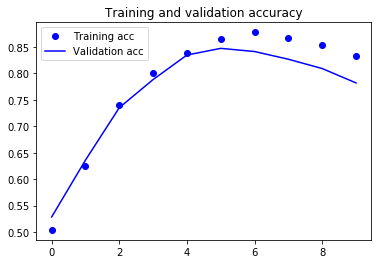

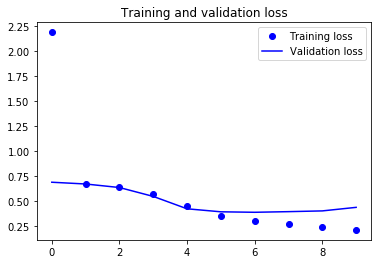

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
